# MLP for Image Classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

### Normalise Data

$$X' = \frac{X-X_{min}}{X_{max}-X_{min}}$$

In [2]:
print(f"min: {X_train.min()}, max: {X_train.max()}")

X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
X_test.min(), X_test.max()

min: 0, max: 255


(0.0, 1.0)

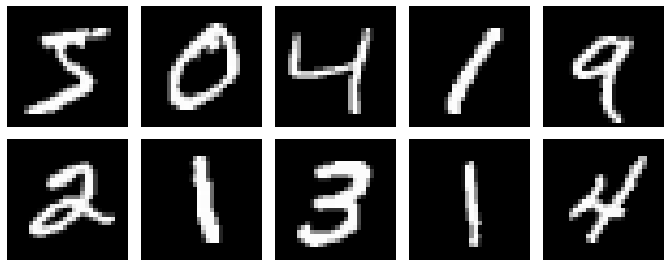

In [3]:
def display_images(data, nrows=2, ncols=5, figsize=(12, 4)):

    fig, axes = plt.subplots(nrows, ncols, figsize = figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i,:,:], cmap="gray") #0-9 and all rows and columns
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=.1, bottom=0)

display_images(X_train)

### MLP Model

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

def MLP_model(nodes=None, names=None, activations=[]):
    model = Sequential(name="MLP_model")
    model.add(Flatten(input_shape=(28, 28), name="input_layer")) #We expect the input to be 28, 28 and Flatten will stretch it

    for node, name, activation in zip(nodes, names, activations):
        model.add(Dense(node, name = name, activation = activation))

    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) #recall and precision has to be created manually as a function, since they do not exist in Keras

    return model

model_1 = MLP_model(nodes = [10], names = ["Output_layer"], activations=["softmax"])
model_1.summary()
# 28x28 -> 784 weights and 1 bias -> 785 * 10 (output nodes) -> 7850 parameters

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 Output_layer (Dense)        (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


2022-04-25 11:03:50.969139: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model_1.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=0)

In [6]:
metrics = pd.DataFrame(model_1.history.history)
metrics.index = range(len(metrics))
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.503179,0.86972,0.308479,0.9159
1,0.316051,0.91196,0.275593,0.9233
2,0.292922,0.91824,0.267682,0.9276
3,0.280956,0.92160,0.262553,0.9290
4,0.273408,0.92382,0.259658,0.9288


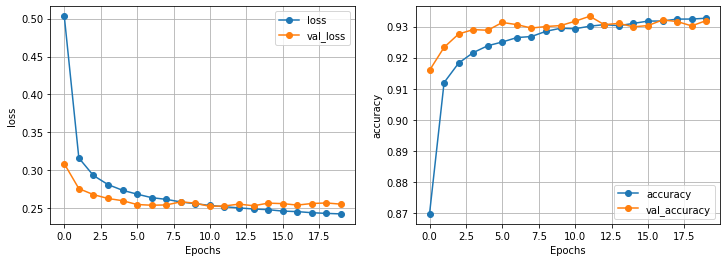

In [7]:
def plot_metrics(df_history, style="-o"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    columns = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]

    for ax, col in zip(axes, columns):
        df_history.plot(y=col, xlabel="Epochs", ylabel=col[0], ax=ax, style=style)
        ax.grid()

plot_metrics(metrics)

#This shows logistic regression since we have no hidden layers

### Hidden layers

In [8]:
model_2 =MLP_model(nodes = [128, 128, 10], activations=["relu", "relu", "softmax"], names=["Hidden1", "Hidden2", "Output"])

model_2.summary()
#785 * 128 = 100480
#129 * 128 = 16512

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden1 (Dense)             (None, 128)               100480    
                                                                 
 Hidden2 (Dense)             (None, 128)               16512     
                                                                 
 Output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_2.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.2459 - accuracy: 0.9272 - val_loss: 0.1184 - val_accuracy: 0.9649
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1043 - accuracy: 0.9684 - val_loss: 0.0927 - val_accuracy: 0.9718
Epoch 3/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.0701 - accuracy: 0.9780 - val_loss: 0.0934 - val_accuracy: 0.9722
Epoch 4/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0565 - accuracy: 0.9815 - val_loss: 0.0965 - val_accuracy: 0.9716
Epoch 5/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.0438 - accuracy: 0.9861 - val_loss: 0.0791 - val_accuracy: 0.9783
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0332 - accuracy: 0.9886 - val_loss: 0.0955 - val_accuracy: 0.9745
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0301 - accuracy: 0.9897 - val_loss: 0.0976 - va

In [10]:
metrics = pd.DataFrame(model_2.history.history)
metrics.index = range(len(metrics))

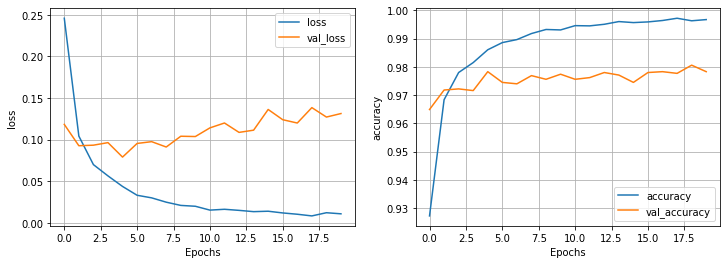

In [11]:
plot_metrics(metrics, style = "-")

In [12]:
model_3 = MLP_model( nodes = [128, 128, 10], activations=["relu", "relu", "softmax"], names=["Hidden1", "Hidden2", "Output"])
model_3.fit(X_train, y_train, epochs = 5, verbose = 1) #Early stopping, and train on all training data

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2377 - accuracy: 0.9301
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0972 - accuracy: 0.9697
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0689 - accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0510 - accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0414 - accuracy: 0.9866


### Prediction and Evaluation

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.92      0.99      0.96       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000



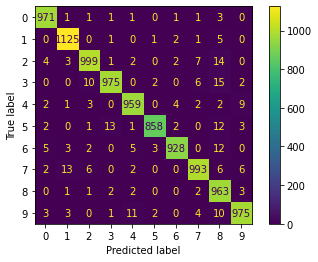

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_3.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

#We have not included the spatial information, because we have flattened the images

### Misclassification

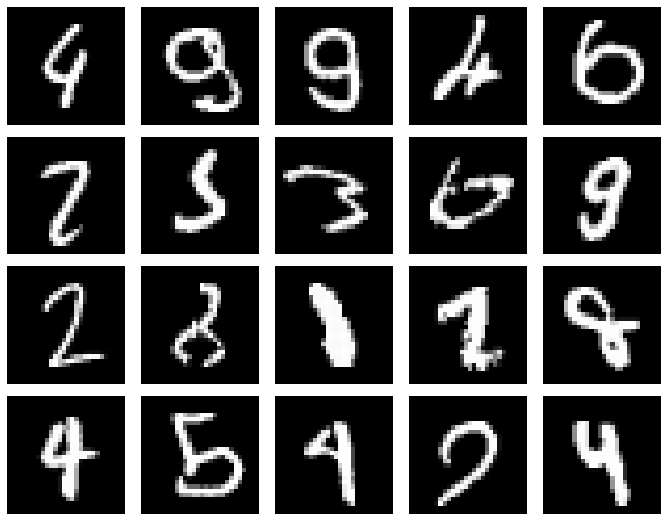

In [14]:
misclassified_indices = np.where(y_pred != y_test)
misclassified_samples = X_test[misclassified_indices]

display_images(misclassified_samples, 4, 5, (12, 8))